In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Nombre de las columnas
names = ['largo-sepalo', 'ancho-sepalo', 'largo-petalo', 'ancho-petalo', 'Clase']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head() 

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values 


In [2]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
y_pred = classifier.predict(X) 

In [6]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y, y_pred)) 
A=confusion_matrix(y, y_pred)
print(1-(np.trace(A)/A.sum()))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
0.033333333333333326


In [7]:
#Usando Conjuntos de Entrenamiento y Prueba para evaluar los resultados

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_pred = classifier.predict(X_test) 

In [11]:
print(confusion_matrix(y_test, y_pred)) 
A=confusion_matrix(y_test, y_pred)
print(1-(np.trace(A)/A.sum()))

[[16  0  0]
 [ 0 14  1]
 [ 0  1 13]]
0.0444444444444444


In [12]:
error = []

# Calculando el error para K entre 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

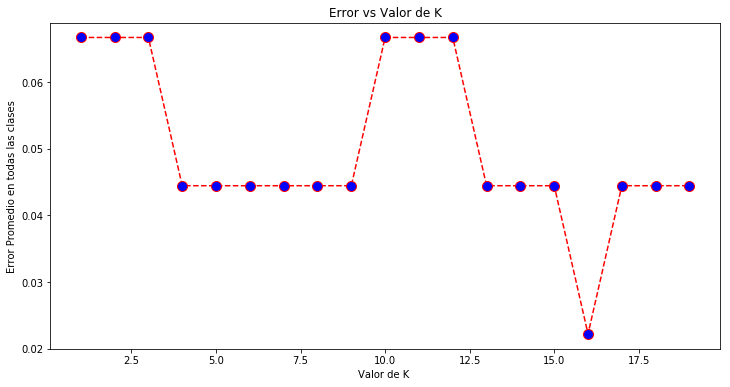

In [13]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error vs Valor de K')  
plt.xlabel('Valor de K ')  
plt.ylabel('Error Promedio en todas las clases')  
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

#Descarga los datos directamente del sitio
#Es mejor descargar el archivo y leerlo directamente
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# Nombre de las columnas
names = names=['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

dataset = pd.read_csv(url, header=None, names=names)
dataset = dataset.set_index('ID')
dataset['Class'].replace(2, 0, inplace=True)
dataset['Class'].replace(4, 1, inplace=True)
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(inplace=True)




In [16]:
y = dataset['Class']
dataset.drop('Class', axis=1, inplace=True)
X = dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [18]:
error = []

# Calculando el error para K entre 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

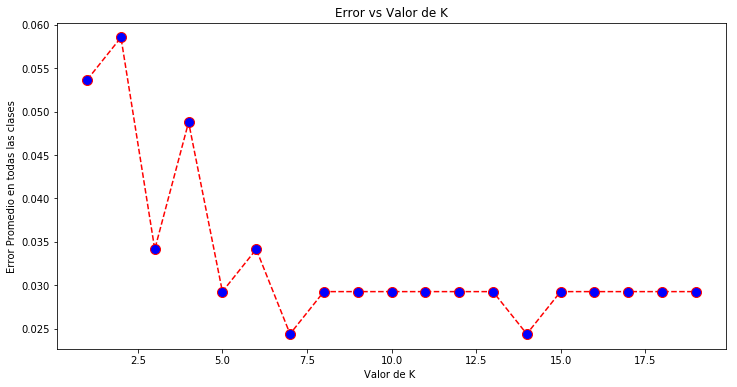

In [19]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error vs Valor de K')  
plt.xlabel('Valor de K ')  
plt.ylabel('Error Promedio en todas las clases')  
plt.show()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
#Pipelines:
#Example de como combinar Preprocesamiento de Datos con un Clasificador
pipe_KNN = Pipeline([('scl', MinMaxScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=3))])


In [30]:
pipe_KNN.fit(X_train, y_train)

Pipeline(steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])

In [31]:
y_pred = pipe_KNN.predict(X_test) 
print(confusion_matrix(y_test, y_pred)) 
A=confusion_matrix(y_test, y_pred)
print(1-(np.trace(A)/A.sum()))

[[129   3]
 [  4  69]]
0.034146341463414664


In [32]:
error = []
# Calculando el error para K entre 1 and 20
for i in range(1, 20):
    pipe_KNN = Pipeline([('scl', StandardScaler()),('clf', KNeighborsClassifier(n_neighbors=i))])
    pipe_KNN.fit(X_train, y_train)
    pred_i = pipe_KNN.predict(X_test)
    error.append(np.mean(pred_i != y_test))

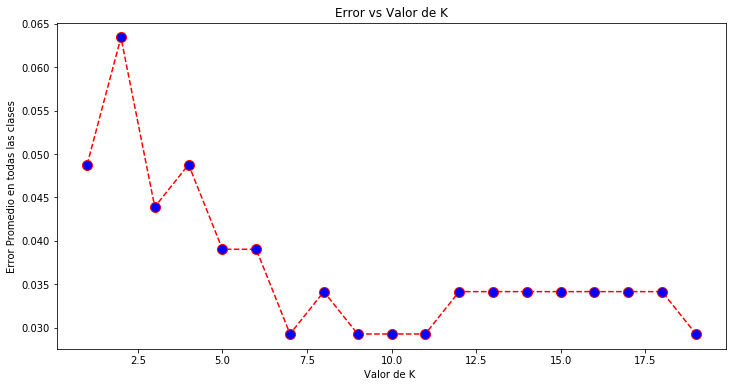

In [33]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error vs Valor de K')  
plt.xlabel('Valor de K ')  
plt.ylabel('Error Promedio en todas las clases')  
plt.show()

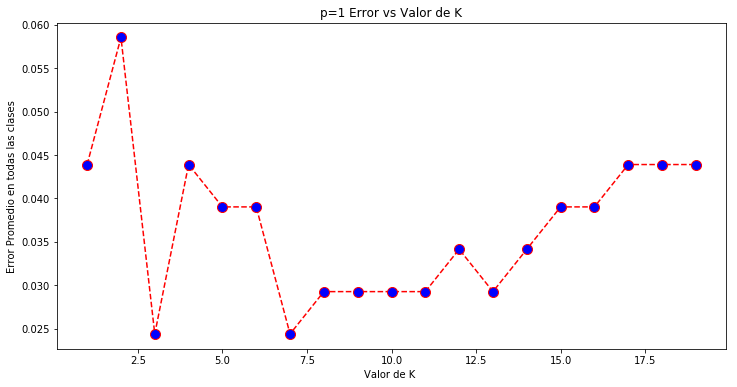

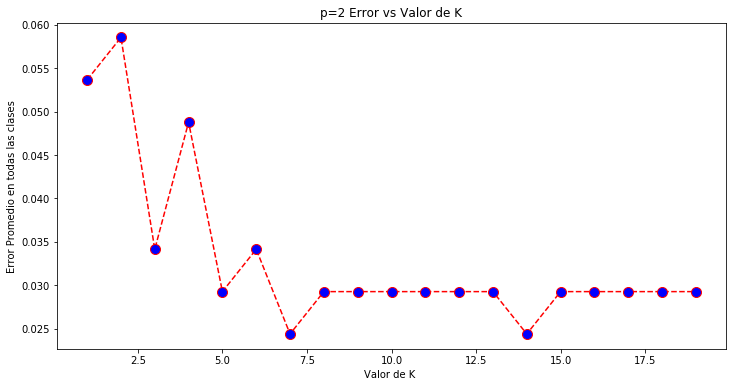

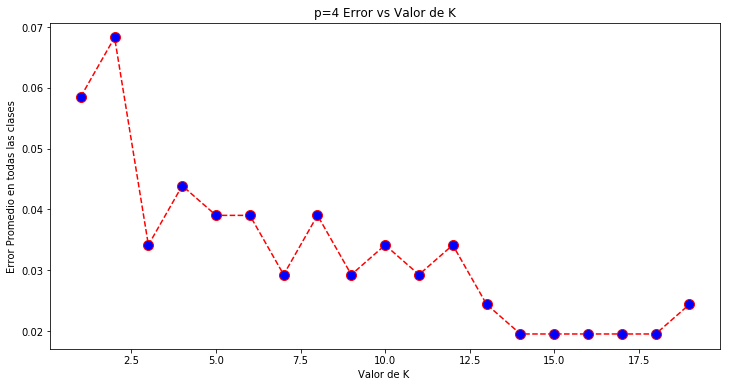

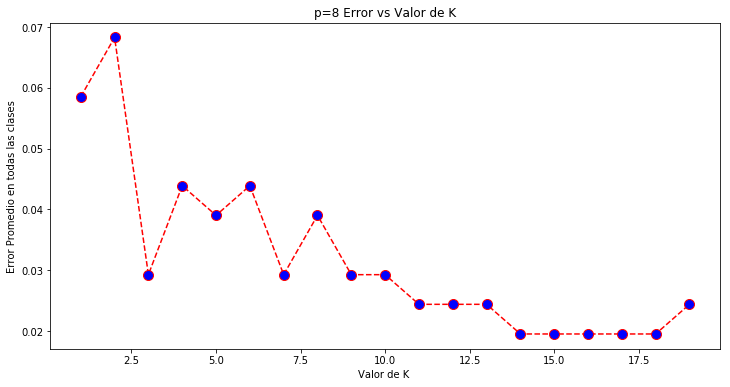

In [27]:
for pnorm in range(0,4,1):
    error = []
    # Calculando el error para K entre 1 and 40
    for i in range(1, 20):  
        knn = KNeighborsClassifier(p=2**pnorm,n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title('p='+str(2**pnorm)+' Error vs Valor de K')  
    plt.xlabel('Valor de K ')  
    plt.ylabel('Error Promedio en todas las clases')  
    plt.show()